# <font color='Cyan'> Modèle à 1 neurone et régression logistique

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#fonction pour avoir un backfround de figure noir
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Dataset

dimension de X : (100, 2)
dimension de y: (100, 1)


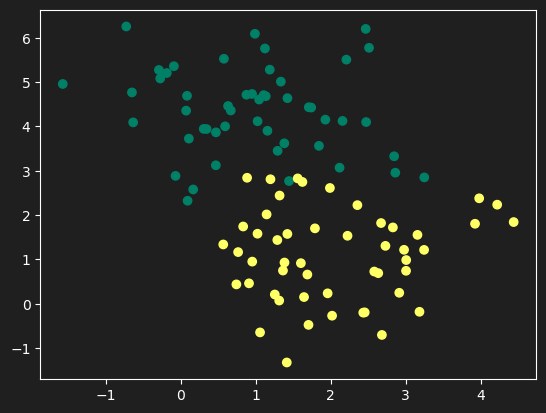

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X :', X.shape)
print('dimension de y:', y.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [6]:
def Initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return(W,b)

In [8]:
W, b = Initialisation(X)
print(W,b)
print(W.shape, b.shape)

[[-0.21954336]
 [-0.38229161]] [-0.05239827]
(2, 1) (1,)


# 2. Model et fonction logistique

In [11]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1/ (1 + np.exp(-Z))
    return A

In [13]:
A = model(X, W, b)
A.shape

(100, 1)

# 3. Fonction coût : Log Loss

In [16]:
def Log_Loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))

In [18]:
Log_Loss(A, y)

0.7107455006422119

# 4. Gradients et Descente de Gradients

In [21]:
def gradients(A, X, y):
    dW = 1/ len(y) * np.dot(X.T, A - y)
    db = 1/ len(y) * np.sum(A - y)
    return(dW, db)

In [23]:
dW, db = gradients(A, X, y)

print(dW.shape, db)

(2, 1) -0.2860393415878371


In [25]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [27]:
print(W, b)

[[-0.21954336]
 [-0.38229161]] [-0.05239827]


In [29]:
def prediction(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [31]:
from sklearn.metrics import accuracy_score

# 5. boucle pour faire notre neurone

In [34]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iterations = 400):
    # initialisons W et b
    W, b = Initialisation(X)
    Loss=[]
   # history=[]
    
    for i in range(n_iterations):
        A = model(X, W, b)
        Loss.append(Log_Loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        #history.append([W, b, Loss, i])

    y_pred = prediction(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return(W, b)

[[9.86245145e-01]
 [8.72399177e-01]
 [1.49116876e-03]
 [1.20996144e-01]
 [9.86582163e-01]
 [3.50500432e-01]
 [3.96406387e-02]
 [9.76063809e-01]
 [2.49945334e-02]
 [9.42470810e-01]
 [1.38234968e-02]
 [9.42161739e-01]
 [9.69355745e-03]
 [7.05702317e-03]
 [8.07917905e-01]
 [9.94318108e-01]
 [9.98021123e-01]
 [1.79128617e-02]
 [8.46414462e-01]
 [7.44955498e-01]
 [2.10073953e-02]
 [1.68090347e-02]
 [4.17701080e-01]
 [1.42134219e-03]
 [9.82305663e-01]
 [1.37686611e-02]
 [9.56096291e-01]
 [2.26421153e-03]
 [3.39350356e-02]
 [8.20571300e-01]
 [9.94166756e-01]
 [2.05612584e-02]
 [7.82257439e-01]
 [9.94281026e-01]
 [4.20011916e-01]
 [1.79908221e-01]
 [8.75037774e-01]
 [6.02970943e-01]
 [4.86895137e-01]
 [5.36400514e-01]
 [4.60386067e-02]
 [3.31550596e-02]
 [1.40052194e-04]
 [1.25648000e-01]
 [1.74536813e-01]
 [9.10775494e-01]
 [9.90250613e-01]
 [9.88484572e-01]
 [1.34196424e-03]
 [2.76325088e-03]
 [9.78213888e-01]
 [6.65748480e-01]
 [1.70453474e-02]
 [1.76892844e-02]
 [8.74519529e-01]
 [1.950011

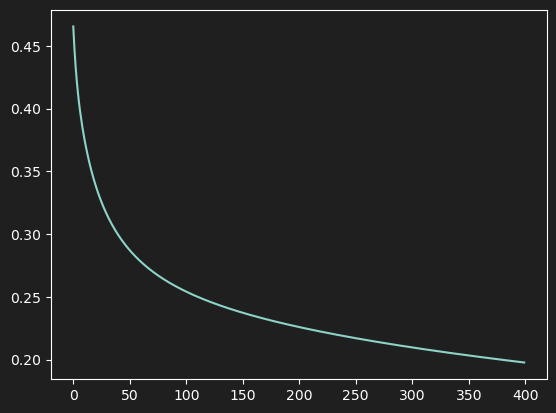

In [36]:
W , b = artificial_neuron(X, y)

# 6. prediction d'un nouvel échantillon

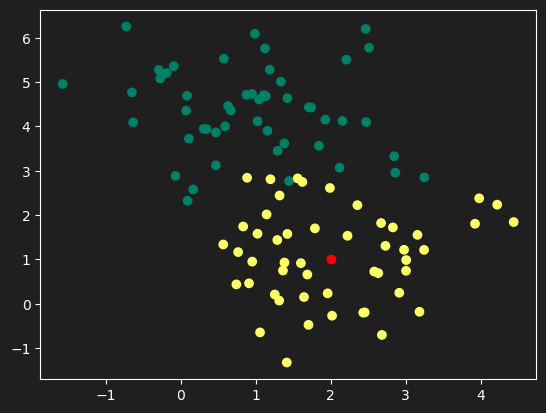

In [52]:
new_point = np.array([2, 1])
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_point[0], new_point[1], c='r')
plt.show()

In [54]:
prediction(new_point, W, b)

[0.94063881]


array([ True])

### On contate que notre nouveau point est bien dans les Z>0 et que la prédiction correspond à ce que l'on attend.

# 7. Frontière de décision

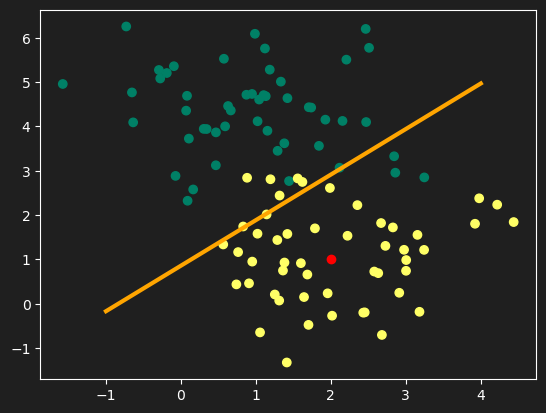

In [44]:
x0 = np.linspace(-1, 4, 100) # notre abscisse qui va de -1 jusqu'a 4 et comporte 100 points
x1 = (-W[0] * x0 - b) / W[1] #notre ordonnée

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c= 'orange', lw=3)
plt.show()